[*********************100%***********************]  1 of 1 completed


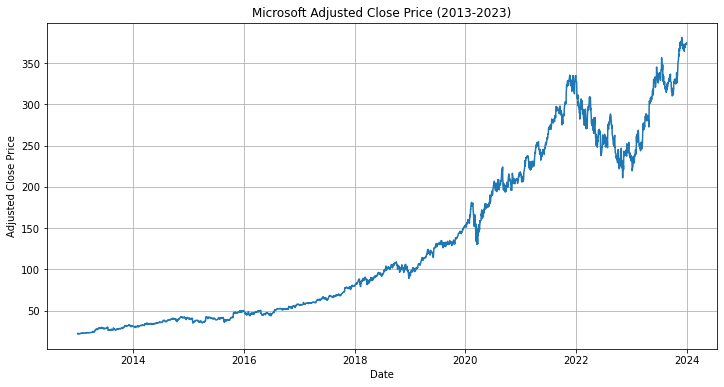

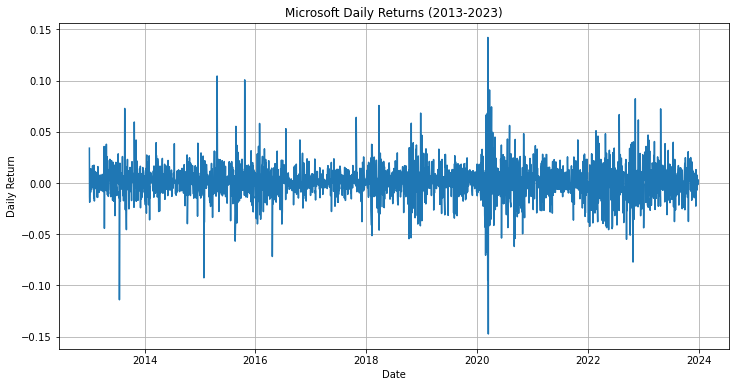

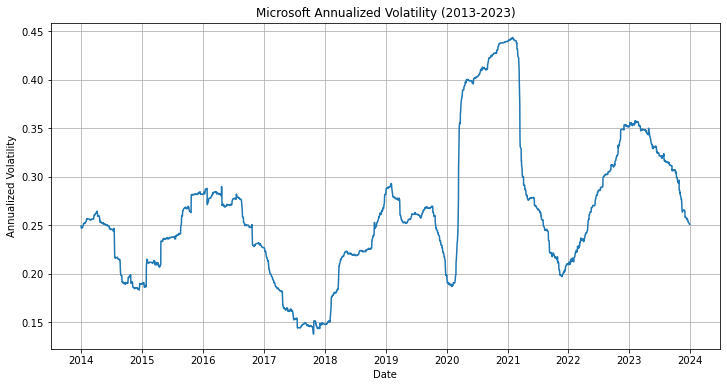

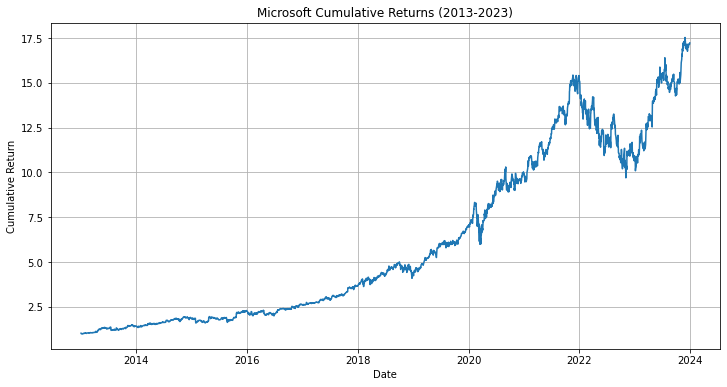

Summary Statistics for Microsoft Stock (2013-2023):
   Mean Daily Return  Median Daily Return  \
0           0.001172             0.000868   

   Standard Deviation of Daily Returns  Annualized Volatility  
0                              0.01693               0.268748  


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Microsoft stock data
ticker = "MSFT"
start_date = "2013-01-01"
end_date = "2023-12-31"
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate annualized volatility
daily_volatility = data['Daily Return'].std()
annualized_volatility = daily_volatility * np.sqrt(252)

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Summary statistics
summary_stats = {
    "Mean Daily Return": data['Daily Return'].mean(),
    "Median Daily Return": data['Daily Return'].median(),
    "Standard Deviation of Daily Returns": data['Daily Return'].std(),
    "Annualized Volatility": annualized_volatility
}
summary_stats_df = pd.DataFrame(summary_stats, index=[0])

# Plot adjusted close price
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'])
plt.title('Microsoft Adjusted Close Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Return'])
plt.title('Microsoft Daily Returns (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Plot annualized volatility
rolling_volatility = data['Daily Return'].rolling(window=252).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility)
plt.title('Microsoft Annualized Volatility (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True)
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Return'])
plt.title('Microsoft Cumulative Returns (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Display summary statistics
print("Summary Statistics for Microsoft Stock (2013-2023):")
print(summary_stats_df)


[*********************100%***********************]  1 of 1 completed


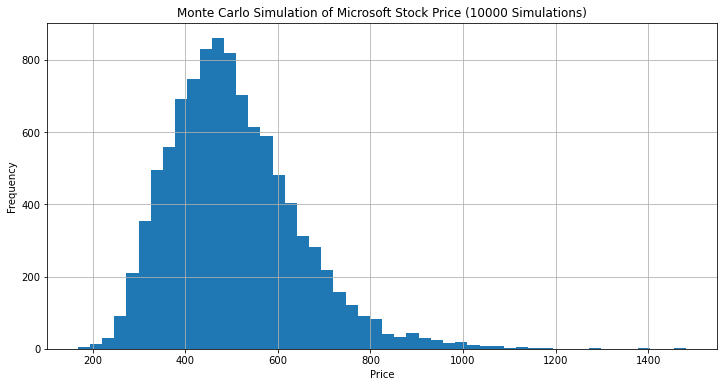

Sharpe Ratio: 0.06689047848816186
Sortino Ratio: 0.09148789953343271
Maximum Drawdown: -0.3714848310146297
[*********************100%***********************]  1 of 1 completed
Beta: 1.1944380385423197
Alpha: 0.0005880299907602264
Simulated Return under Market Crash (-20%): -0.23771550250569987
Autocorrelation of Daily Returns: -0.12770413941695521


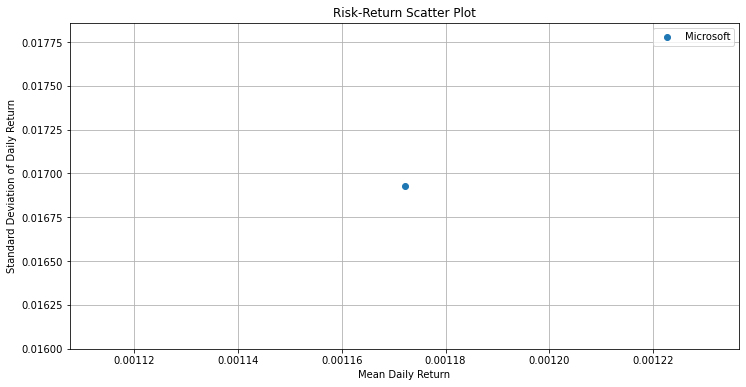

Summary Statistics for Microsoft Stock (VaR and Monte Carlo Simulation):
   Historical VaR (95%)  Simulated VaR (95%)  Mean Simulated Price  \
0             -0.025437           311.478662            504.948562   

   Median Simulated Price  Sharpe Ratio  Sortino Ratio  Maximum Drawdown  \
0              487.401622       0.06689       0.091488         -0.371485   

       Beta     Alpha  Autocorrelation  
0  1.194438  0.000588        -0.127704  


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Microsoft stock data
ticker = "MSFT"
start_date = "2013-01-01"
end_date = "2023-12-31"
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Value at Risk (VaR) calculation
confidence_level = 0.95
VaR = np.percentile(data['Daily Return'].dropna(), (1 - confidence_level) * 100)

# Monte Carlo simulation
num_simulations = 10000
num_days = 252

last_price = data['Adj Close'][-1]
simulation_results = np.zeros(num_simulations)

for i in range(num_simulations):
    daily_returns_simulated = np.random.normal(data['Daily Return'].mean(), data['Daily Return'].std(), num_days)
    price_series = [last_price]
    
    for daily_return in daily_returns_simulated:
        price_series.append(price_series[-1] * (1 + daily_return))
    
    simulation_results[i] = price_series[-1]

# Plot Monte Carlo simulation
plt.figure(figsize=(12, 6))
plt.hist(simulation_results, bins=50)
plt.title('Monte Carlo Simulation of Microsoft Stock Price (10000 Simulations)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate VaR from Monte Carlo simulation
simulated_VaR = np.percentile(simulation_results, (1 - confidence_level) * 100)

# Calculate Sharpe Ratio
risk_free_rate = 0.01  # Assume 1% risk-free rate
sharpe_ratio = (data['Daily Return'].mean() - risk_free_rate / 252) / data['Daily Return'].std()
print("Sharpe Ratio:", sharpe_ratio)

# Calculate Sortino Ratio
downside_returns = data['Daily Return'][data['Daily Return'] < 0]
sortino_ratio = (data['Daily Return'].mean() - risk_free_rate / 252) / downside_returns.std()
print("Sortino Ratio:", sortino_ratio)

# Calculate Maximum Drawdown
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Max'] = data['Cumulative Return'].cummax()
data['Drawdown'] = data['Cumulative Return'] / data['Cumulative Max'] - 1
max_drawdown = data['Drawdown'].min()
print("Maximum Drawdown:", max_drawdown)

# Calculate Beta
market_data = yf.download("^GSPC", start=start_date, end=end_date)  # S&P 500 as market index
market_data['Market Return'] = market_data['Adj Close'].pct_change()
cov_matrix = np.cov(data['Daily Return'].dropna(), market_data['Market Return'].dropna())
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
print("Beta:", beta)

# Calculate Alpha
alpha = data['Daily Return'].mean() - (risk_free_rate / 252 + beta * (market_data['Market Return'].mean() - risk_free_rate / 252))
print("Alpha:", alpha)

# Stress Testing: Hypothetical Market Crash
stress_test_scenario = -0.2  # Assume a 20% market crash
simulated_stress_return = data['Daily Return'].mean() + beta * stress_test_scenario
print("Simulated Return under Market Crash (-20%):", simulated_stress_return)

# Autocorrelation Analysis
autocorrelation = data['Daily Return'].autocorr()
print("Autocorrelation of Daily Returns:", autocorrelation)

# Risk-Return Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Daily Return'].mean(), data['Daily Return'].std(), label='Microsoft')
plt.xlabel('Mean Daily Return')
plt.ylabel('Standard Deviation of Daily Return')
plt.title('Risk-Return Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
summary_stats = {
    "Historical VaR (95%)": VaR,
    "Simulated VaR (95%)": simulated_VaR,
    "Mean Simulated Price": np.mean(simulation_results),
    "Median Simulated Price": np.median(simulation_results),
    "Sharpe Ratio": sharpe_ratio,
    "Sortino Ratio": sortino_ratio,
    "Maximum Drawdown": max_drawdown,
    "Beta": beta,
    "Alpha": alpha,
    "Autocorrelation": autocorrelation
}
summary_stats_df = pd.DataFrame(summary_stats, index=[0])

# Display summary statistics
print("Summary Statistics for Microsoft Stock (VaR and Monte Carlo Simulation):")
print(summary_stats_df)
